In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
covid_data = pd.read_csv("BDM_p2\covid_data_latest\covid_19_data.csv",parse_dates=["ObservationDate","Last Update"])

In [3]:
covid_data.head()

SNo ObservationDate Province/State  Country/Region         Last Update  \
0    1      2020-01-22          Anhui  Mainland China 2020-01-22 17:00:00   
1    2      2020-01-22        Beijing  Mainland China 2020-01-22 17:00:00   
2    3      2020-01-22      Chongqing  Mainland China 2020-01-22 17:00:00   
3    4      2020-01-22         Fujian  Mainland China 2020-01-22 17:00:00   
4    5      2020-01-22          Gansu  Mainland China 2020-01-22 17:00:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

In [4]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62675 entries, 0 to 62674
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SNo              62675 non-null  int64         
 1   ObservationDate  62675 non-null  datetime64[ns]
 2   Province/State   39590 non-null  object        
 3   Country/Region   62675 non-null  object        
 4   Last Update      62675 non-null  datetime64[ns]
 5   Confirmed        62675 non-null  float64       
 6   Deaths           62675 non-null  float64       
 7   Recovered        62675 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 3.8+ MB


In [5]:
covid_data["Confirmed"]=covid_data["Confirmed"].astype("int64")
covid_data["Recovered"]=covid_data["Recovered"].astype("int64")
covid_data["Deaths"]=covid_data["Deaths"].astype("int64")

In [6]:
covid_data.tail()

SNo ObservationDate      Province/State  Country/Region  \
62670  62671      2020-07-12           Zacatecas          Mexico   
62671  62672      2020-07-12  Zakarpattia Oblast         Ukraine   
62672  62673      2020-07-12   Zaporizhia Oblast         Ukraine   
62673  62674      2020-07-12            Zhejiang  Mainland China   
62674  62675      2020-07-12     Zhytomyr Oblast         Ukraine   

              Last Update  Confirmed  Deaths  Recovered  
62670 2020-07-13 04:43:04       1394     137        932  
62671 2020-07-13 04:43:04       3909     139       1258  
62672 2020-07-13 04:43:04        621      20        509  
62673 2020-07-13 04:43:04       1270       1       1267  
62674 2020-07-13 04:43:04       1532      34       1129

In [7]:
covid_data.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     23085
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [10]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
from plotly.subplots import make_subplots

In [12]:
grouped_data = covid_data.groupby('ObservationDate')['Recovered', 'Confirmed', 'Deaths'].sum().reset_index()

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [13]:
grouped_data["Active"] = abs(grouped_data["Confirmed"]-(grouped_data["Recovered"]+grouped_data["Deaths"]))

In [14]:
us_data = covid_data[covid_data["Country/Region"]=="US"].reset_index()
us_grouped_data = us_data.groupby("ObservationDate")['Recovered', 'Confirmed', 'Deaths'].sum().reset_index()
us_grouped_data["Active"] = abs(us_grouped_data["Confirmed"]-(us_grouped_data["Recovered"]+us_grouped_data["Deaths"]))
fig_us = px.line(us_grouped_data,x="ObservationDate",y=['Recovered', 'Confirmed', 'Deaths','Active'],title="Covid Statistics in US")
fig_us.show()

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [15]:
india_data = covid_data[covid_data["Country/Region"]=="India"].reset_index()
india_grouped_data = india_data.groupby("ObservationDate")['Recovered', 'Confirmed', 'Deaths'].sum().reset_index()
india_grouped_data["Active"] = abs(india_grouped_data["Confirmed"]-(india_grouped_data["Recovered"]+india_grouped_data["Deaths"]))
fig_india = px.line(india_grouped_data,x="ObservationDate",y=['Recovered', 'Confirmed', 'Deaths','Active'],title="Covid Statistics in India")
fig_india.show()

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [17]:
Dates = pd.DataFrame(india_grouped_data["ObservationDate"])

In [18]:
confirmed = pd.DataFrame(india_grouped_data["Confirmed"])

In [19]:
recovered = pd.DataFrame(india_grouped_data["Recovered"])

In [20]:
Deaths = pd.DataFrame(india_grouped_data["Deaths"])

In [21]:
Active = pd.DataFrame(india_grouped_data["Active"])

In [22]:
dates_confirmed = pd.concat((Dates,confirmed),axis=1)

In [23]:
dates_recovered = pd.concat((Dates,recovered),axis=1)

In [24]:
dates_deaths = pd.concat((Dates,Deaths),axis=1)

In [25]:
dates_active = pd.concat((Dates,Active),axis=1)

In [26]:
dates_active.columns= ["ds","y"]
dates_recovered.columns= ["ds","y"]
dates_deaths.columns= ["ds","y"]
dates_confirmed.columns = ["ds","y"]

In [27]:
from fbprophet import Prophet

In [48]:
prophet_basic = Prophet()
prophet_basic.fit(dates_confirmed)
future_confirmed = prophet_basic.make_future_dataframe(periods=30)
forecast_confirmed = prophet_basic.predict(future_confirmed)
fig_confirmed = prophet_basic.plot(forecast_confirmed)
forecast_confirmed.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds         trend    yhat_lower    yhat_upper   trend_lower  \
190 2020-08-07  1.267417e+06  1.229609e+06  1.303175e+06  1.233612e+06   
191 2020-08-08  1.284787e+06  1.246099e+06  1.324587e+06  1.248805e+06   
192 2020-08-09  1.302157e+06  1.265585e+06  1.343795e+06  1.264095e+06   
193 2020-08-10  1.319527e+06  1.279329e+06  1.361492e+06  1.279348e+06   
194 2020-08-11  1.336897e+06  1.291342e+06  1.382529e+06  1.294847e+06   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
190  1.300462e+06     -139.732443           -139.732443           -139.732443   
191  1.319940e+06      671.689477            671.689477            671.689477   
192  1.339691e+06     1515.420183           1515.420183           1515.420183   
193  1.359340e+06     -638.112811           -638.112811           -638.112811   
194  1.379152e+06     -440.967240           -440.967240           -440.967240   

          weekly  weekly_lower  weekly_upper  multiplicative_terms  \
190  -139.732443   -139.732443   -139.732443                   0.0   
191   671.689477    671.689477    671.689477                   0.0   
192  1515.420183   1515.420183   1515.420183                   0.0   
193  -638.112811   -638.112811   -638.112811                   0.0   
194  -440.967240   -440.967240   -440.967240                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
190                         0.0                         0.0  1.267277e+06  
191                         0.0                         0.0  1.285459e+06  
192                         0.0                         0.0  1.303673e+06  
193                         0.0                         0.0  1.318889e+06  
194                         0.0                         0.0  1.336456e+06

In [33]:
prediction = pd.DataFrame(forecast_confirmed).to_csv('forecast_1_137.csv')

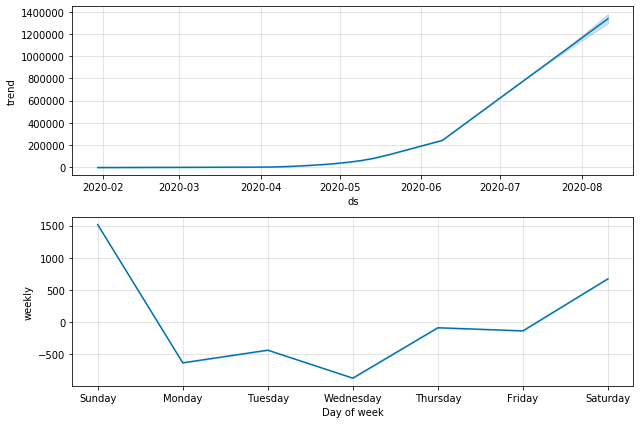

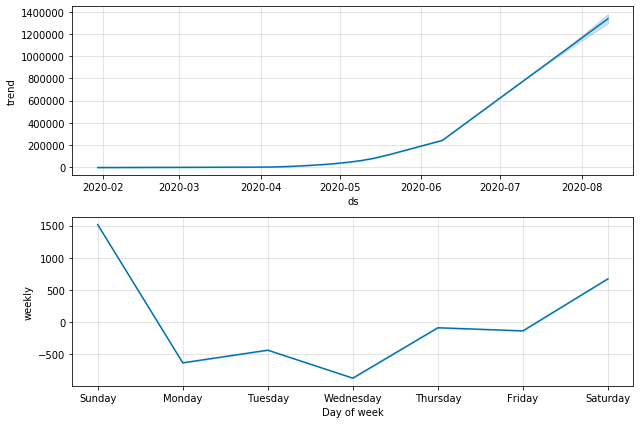

In [49]:
prophet_basic.plot_components(forecast_confirmed)

In [36]:
prophet_basic.fit(dates_deaths)
future_confirmed = prophet_basic.make_future_dataframe(periods=30)
forecast_confirmed = prophet_basic.predict(future_confirmed)
fig_confirmed = prophet_basic.plot(forecast_confirmed)
forecast_confirmed.tail()

Exception: Prophet object can only be fit once. Instantiate a new object.

In [43]:
prophet_deaths = Prophet()
prophet_deaths.fit(dates_deaths)
future_deaths = prophet_deaths.make_future_dataframe(periods=30)
forecast_deaths= prophet_deaths.predict(future_deaths)
fig_deaths = prophet_deaths.plot(forecast_deaths)
forecast_deaths.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds         trend    yhat_lower    yhat_upper   trend_lower  \
190 2020-08-07  35102.589513  34175.954278  36067.507860  34215.907784   
191 2020-08-08  35566.071307  34615.226400  36561.260878  34646.314366   
192 2020-08-09  36029.553102  34987.947949  37094.889733  35042.380763   
193 2020-08-10  36493.034896  35381.078167  37561.059326  35473.230528   
194 2020-08-11  36956.516691  35855.685552  38145.494272  35877.675705   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
190  36023.578053       -9.088664             -9.088664             -9.088664   
191  36528.758054      -10.823757            -10.823757            -10.823757   
192  37035.606257      -22.670594            -22.670594            -22.670594   
193  37576.628258      -28.960994            -28.960994            -28.960994   
194  38093.784003       41.601335             41.601335             41.601335   

        weekly  weekly_lower  weekly_upper  multiplicative_terms  \
190  -9.088664     -9.088664     -9.088664                   0.0   
191 -10.823757    -10.823757    -10.823757                   0.0   
192 -22.670594    -22.670594    -22.670594                   0.0   
193 -28.960994    -28.960994    -28.960994                   0.0   
194  41.601335     41.601335     41.601335                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
190                         0.0                         0.0  35093.500849  
191                         0.0                         0.0  35555.247550  
192                         0.0                         0.0  36006.882508  
193                         0.0                         0.0  36464.073902  
194                         0.0                         0.0  36998.118025

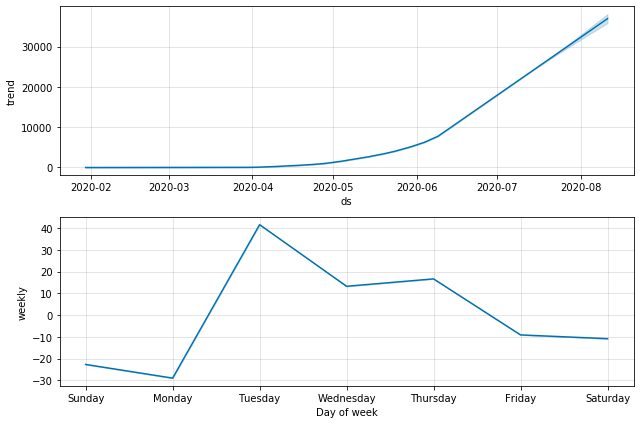

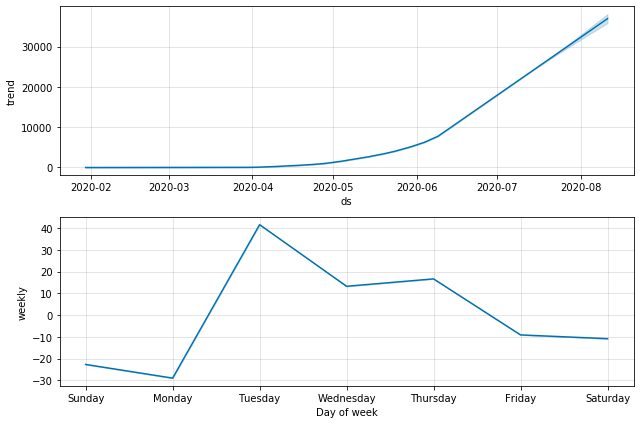

In [51]:
prophet_deaths.plot_components(forecast_deaths)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds          trend     yhat_lower     yhat_upper    trend_lower  \
190 2020-08-07  822143.098402  795089.883166  848058.868879  798144.887291   
191 2020-08-08  834192.932880  807472.072277  860537.804715  808425.687352   
192 2020-08-09  846242.767359  816717.763049  875323.066766  818440.551144   
193 2020-08-10  858292.601837  827096.891863  886896.206768  828641.458352   
194 2020-08-11  870342.436315  838080.388061  900724.202677  838952.859353   

       trend_upper  additive_terms  additive_terms_lower  \
190  845444.362105      108.503606            108.503606   
191  858872.386829      643.672186            643.672186   
192  872439.737382      912.963346            912.963346   
193  886183.935514     -539.596822           -539.596822   
194  899891.167903     -389.472636           -389.472636   

     additive_terms_upper      weekly  weekly_lower  weekly_upper  \
190            108.503606  108.503606    108.503606    108.503606   
191            643.672186  643.672186    643.672186    643.672186   
192            912.963346  912.963346    912.963346    912.963346   
193           -539.596822 -539.596822   -539.596822   -539.596822   
194           -389.472636 -389.472636   -389.472636   -389.472636   

     multiplicative_terms  multiplicative_terms_lower  \
190                   0.0                         0.0   
191                   0.0                         0.0   
192                   0.0                         0.0   
193                   0.0                         0.0   
194                   0.0                         0.0   

     multiplicative_terms_upper           yhat  
190                         0.0  822251.602008  
191                         0.0  834836.605066  
192                         0.0  847155.730704  
193                         0.0  857753.005015  
194                         0.0  869952.963679

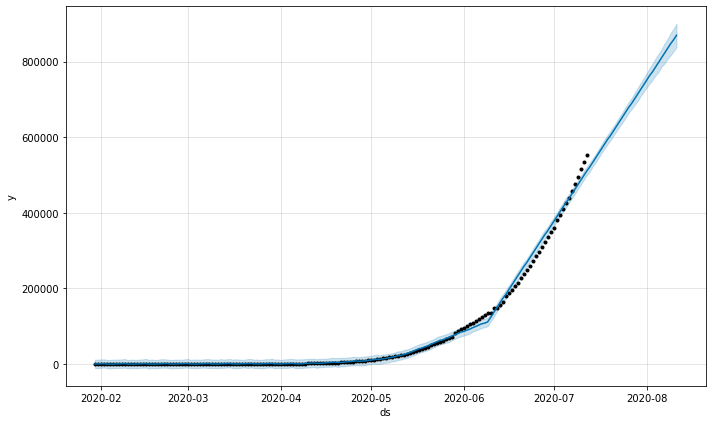

In [44]:
prophet_recovered = Prophet()
prophet_recovered.fit(dates_recovered)
future_recovered = prophet_recovered.make_future_dataframe(periods=30)
forecast_recovered = prophet_recovered.predict(future_recovered)
fig_recovered = prophet_recovered.plot(forecast_recovered)
forecast_recovered.tail()

In [40]:
prediction = pd.DataFrame(forecast_confirmed).to_csv('forecast_recovered_137.csv')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds          trend     yhat_lower     yhat_upper    trend_lower  \
190 2020-08-07  410630.653584  398883.086103  420242.013064  400105.193639   
191 2020-08-08  415496.191072  403172.770994  426460.553031  404433.732712   
192 2020-08-09  420361.728560  408449.202038  432998.415088  408715.801588   
193 2020-08-10  425227.266049  411533.329214  437353.100378  412955.335084   
194 2020-08-11  430092.803537  415400.350149  442469.982082  417315.401935   

       trend_upper  additive_terms  additive_terms_lower  \
190  419915.523183     -246.092639           -246.092639   
191  425448.111275       39.941078             39.941078   
192  431059.506564      626.820142            626.820142   
193  436502.383410      -61.021593            -61.021593   
194  442015.170045      -88.867877            -88.867877   

     additive_terms_upper      weekly  weekly_lower  weekly_upper  \
190           -246.092639 -246.092639   -246.092639   -246.092639   
191             39.941078   39.941078     39.941078     39.941078   
192            626.820142  626.820142    626.820142    626.820142   
193            -61.021593  -61.021593    -61.021593    -61.021593   
194            -88.867877  -88.867877    -88.867877    -88.867877   

     multiplicative_terms  multiplicative_terms_lower  \
190                   0.0                         0.0   
191                   0.0                         0.0   
192                   0.0                         0.0   
193                   0.0                         0.0   
194                   0.0                         0.0   

     multiplicative_terms_upper           yhat  
190                         0.0  410384.560945  
191                         0.0  415536.132150  
192                         0.0  420988.548702  
193                         0.0  425166.244455  
194                         0.0  430003.935660

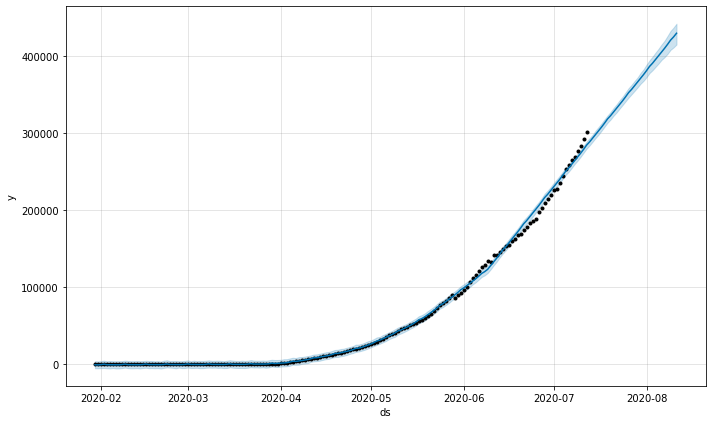

In [45]:
prophet_active = Prophet()
prophet_active.fit(dates_active)
future_active = prophet_active.make_future_dataframe(periods=30)
forecast_active = prophet_active.predict(future_active)
fig_active = prophet_active.plot(forecast_active)
forecast_active.tail()

In [42]:
prediction = pd.DataFrame(forecast_confirmed).to_csv('forecast_active_137.csv')

In [52]:
predicted_confirmed = forecast_confirmed[["yhat"]]
predicted_recovered = forecast_recovered[["yhat"]]
predicted_active = forecast_active[["yhat"]]
predicted_deaths = forecast_deaths[["yhat"]]
prediction_dates = forecast_confirmed[["ds"]]
prediction_df = pd.concat([prediction_dates,predicted_confirmed,predicted_deaths,predicted_recovered,predicted_active],axis=1)

In [53]:
prediction_df.columns = ["Date","Confirmed","Deaths","Recovered","Active"]
# plot using plotly
fig_prediction = px.line(prediction_df,x="Date",y=['Recovered', 'Confirmed', 'Deaths','Active'],title="Covid Prediction in India")
fig_prediction.show()